Project
=====

**Due:** April 26, 2019 by 11:59PM via Blackboard
**Vaule:** 150 points

In [1]:
MY_NAME = "Chris Phillips" # <-- Your name here

**Description:** Apply some of the techniques you have learned this semester to a new dataset.  In doing so, create a tutorial that you can share with the class.

**Requirements:** 
i) The dataset must be something that is available on-line and that can be accessed via a URL.  The notebook must be entirely self-contained. 
ii) Your implementation must be accompanied by a description.
iii) You may use existing tutorials but you must provide a citation as a URL and must *paraphrase* the text and code. iv) You may NOT simply repackage an existing notebook.

The project is yours.  Do and share great things!

# Diabetes Regression Tutorial

### In this tutorial, we will be looking at the diabetes dataset provided by sklearn. This dataset is similar to the boston housing price data that we've used in the past.
### Objective: Learn how to use various regressions in order to predict the target for this dataset. By the end of this tutorial, we should have a good feel for some regressions and we should be able to see which regression has provided us with the best predictions.

First, we want to import all the modules we will be using to explore this dataset. We will also define a few methods, that will be useful in our evaluations later.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold 
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm


def mean_difference(a, b):
    return np.sqrt(np.square((a - b))).sum() / a.shape[0]

def train_and_evaluate_model(train_X, train_y, val_X, val_y):
    reg = LinearRegression().fit(train_X, train_y)
    train_y_hat = reg.predict(train_X)
    val_y_hat = reg.predict(val_X)
    
    return (mean_difference(train_y, train_y_hat), mean_difference(val_y, val_y_hat))

Then, we want to import the data. Once we've imported the data, we will perform an 80/20 split. 80% of the data will be our training data while 20% of our data will be the validation data. Finally, we will print out the data and make sure everything is in order.

In [3]:
X, y = load_diabetes(return_X_y=True)

N = int(0.8 * X.shape[0])

train_X = X[:N,:]
train_y = y[:N]
val_X = X[N:,:]
val_y = y[N:]

print X, y

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]] [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

Now, lets look at the first model we'll be evaluating, the classic linear regression.

In [4]:
reg = LinearRegression().fit(train_X, train_y)

train_y_hat = reg.predict(train_X)
val_y_hat = reg.predict(val_X)

print "Score on training: ", reg.score(train_X, train_y)
print "Mean difference on training: ", mean_difference(train_y, train_y_hat)
print "Score on validation: ", reg.score(val_X, val_y)
print "Mean difference on validation: ", mean_difference(val_y, val_y_hat)

Score on training:  0.5088933608685378
Mean difference on training:  43.4787394570525
Score on validation:  0.543757097617623
Mean difference on validation:  42.54819305780144


While we're here, lets visualize this data. We want this data to be as much of a straight line as possible. The ideal would be where X = Y. This would mean that the predictions lined up perfectly with the true values of the data.

Text(0,0.5,'Predictions')

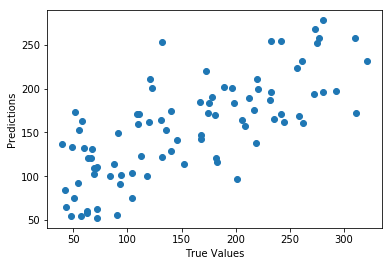

In [5]:
plt.scatter(val_y, val_y_hat)
plt.xlabel('True Values')
plt.ylabel('Predictions')

The last thing we can look at doing with this regression is finding which features are the most predictive of diabetes. We will look at greedily finding the best 4 features.

In [6]:
features = []

for i in range(0, X.shape[1]):
    sub_train_X = train_X[:,i].reshape((-1,1))
    sub_val_X = val_X[:,i].reshape((-1,1))
    
#     print i, train_and_evaluate_model(sub_train_X, train_y, sub_val_X, val_y)
    
features.append(2)

# print "-------"
for i in [i for i in range(0, X.shape[1]) if i not in features]:
    sub_train_X = train_X[:, [i, features[0]]]
    sub_val_X = val_X[:, [i, features[0]]]
    
#     print i, features[0], train_and_evaluate_model(sub_train_X, train_y, sub_val_X, val_y)
    
features.append(8)

# print "-------"
for i in [i for i in range(0, X.shape[1]) if i not in features]:
    sub_train_X = train_X[:, [i, features[0], features[1]]]
    sub_val_X = val_X[:, [i, features[0], features[1]]]
    
#     print i, features[1], features[0], train_and_evaluate_model(sub_train_X, train_y, sub_val_X, val_y)
    
features.append(3)

# print "-------"
for i in [i for i in range(0, X.shape[1]) if i not in features]:
    sub_train_X = train_X[:, [i, features[0], features[1], features[2]]]
    sub_val_X = val_X[:, [i, features[0], features[1], features[2]]]
    
#     print i, features[2], features[1], features[0], train_and_evaluate_model(sub_train_X, train_y, sub_val_X, val_y)
    
features.append(4)

sub_train_X = train_X[:, [features[0], features[1], features[2], features[3]]]
sub_val_X = val_X[:, [features[0], features[1], features[2], features[3]]]

results = train_and_evaluate_model(sub_train_X, train_y, sub_val_X, val_y)

print('After 4 rounds, the best set of features is {}. These features came back with the following pair of mean differences: {}'
      .format(features, results))

print('Referencing the SciKit Learn documentation, we know that these features are:')
print("Body Mass Index \nAverage Blood Pressure \nBlood Serum Measurement 1 \nBlood Serum Measurement 5")


After 4 rounds, the best set of features is [2, 8, 3, 4]. These features came back with the following pair of mean differences: (45.04745262851978, 44.45193091463713)
Referencing the SciKit Learn documentation, we know that these features are:
Body Mass Index 
Average Blood Pressure 
Blood Serum Measurement 1 
Blood Serum Measurement 5


Next, we will move into using a support vector machine and analyzing how well it performs a regression.

In [7]:
clf = svm.SVC()
clf.fit(train_X, train_y)

train_y_hat = clf.predict(train_X)
val_y_hat = clf.predict(val_X)

print "Score on training: ", clf.score(train_X, train_y)
print "Mean difference on training: ", mean_difference(train_y, train_y_hat)
print "Score on validation: ", clf.score(val_X, val_y)
print "Mean difference on validation: ", mean_difference(val_y, val_y_hat)

Score on training: 

/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


 0.0169971671388102
Mean difference on training:  78.43059490084985
Score on validation:  0.0
Mean difference on validation:  78.95505617977528


These results look significantly worse than the linear regression, let's try plotting it out to see if we can confirm or deny that this model isn't working very well.

Text(0,0.5,'Predictions')

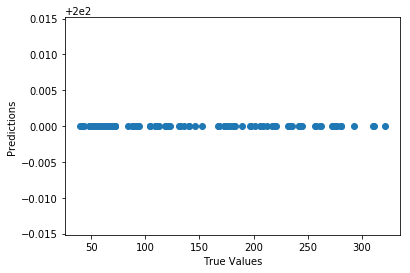

In [8]:
plt.scatter(val_y, val_y_hat)
plt.xlabel('True Values')
plt.ylabel('Predictions')

That doesn't look good at all! None of these predictions were right, or even close for that matter. All of these predictions seem to all be converging on 0. Let's see what a 20-fold cross validation could tell us.

In [9]:
k = 20

kf = KFold(n_splits=k) 
kf.get_n_splits(X)

fold_accuracies = []

for train_index, val_index in kf.split(X):

    train_X = X[train_index,:]
    train_y = y[train_index]
    val_X = X[val_index,:]
    val_y = y[val_index]
    
    clf = svm.SVC(C=1, gamma=0.0001)
    clf.fit(train_X, train_y)
    
    fold_accuracies.append(accuracy_score(clf.predict(val_X), val_y))

print "Accuracy on validation folds"
print fold_accuracies

print "Avg. over all validation folds", sum(fold_accuracies) / k

Accuracy on validation folds
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.045454545454545456, 0.0, 0.0, 0.0, 0.0]
Avg. over all validation folds 0.0022727272727272726


So, a support vector machine might not be the best choice for us here. Lets move on to our final regression, a logistic regression, to see what kind of results we can get here.

In [10]:
logReg = LogisticRegression().fit(train_X, train_y)

train_y_hat = logReg.predict(train_X)
val_y_hat = logReg.predict(val_X)

print "Score on training: ", logReg.score(train_X, train_y)
print "Mean difference on training: ", mean_difference(train_y, train_y_hat)
print "Score on validation: ", logReg.score(val_X, val_y)
print "Mean difference on validation: ", mean_difference(val_y, val_y_hat)

Score on training:  0.014285714285714285
Mean difference on training:  78.20238095238095
Score on validation:  0.0
Mean difference on validation:  84.9090909090909


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Finally, we will graph this one to confirm the numbers that we are seeing here.

Text(0,0.5,'Predictions')

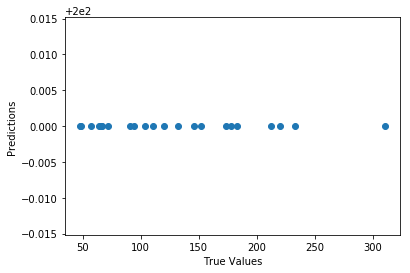

In [11]:
plt.scatter(val_y, val_y_hat)
plt.xlabel('True Values')
plt.ylabel('Predictions')

As we can see, we are still having problems similar to those of the support vector machine. The X's are not lining up with the Y's meaning that the predictions are not matching up with the true values.

## Conclusions

As we have discovered through the course of this tutorial, the linear regression is simply the best regression for evaluating this dataset. We're able to see this in both the acurracy ratings, that did far better than the other two regressions, and the graph, that showed a postive linear relationship, as opposed to the lack of relationship that we see on the other two graphs. However, through this tutorial, and the use of a linear regression, we were able to discover some nifty information in regards to diabetes and some potential symptoms.

A higher score for any of the following correlates with a higher likelihood of diabetes:
* Body Mass Index
* Average Blood Pressure
* TC - blood measurement
* LTG - blood measurement

References
-----

* [Towards Data Science](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)

* [SciKit Learn Diabetes Documentation](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset)


Footnotes
-----

* [Working with Markdown in Jupyter](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).
* [Creating a Jupyter notebook](https://www.dataquest.io/blog/jupyter-notebook-tutorial/).